In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')

In [3]:
df.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
tree = RandomForestClassifier()

In [7]:
y = df['class']

In [8]:
X = df.drop('class', axis=1)

In [10]:
from sklearn.model_selection import RandomizedSearchCV

In [96]:
parameters = {'max_depth' : range(5,16, 5),
              'n_estimators' : range(15,46,5)}

In [13]:
r_tree = RandomizedSearchCV(tree, parameters, cv=5, n_jobs=-1)

In [14]:
r_tree.fit(X,y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': range(4, 25),
                                        'min_samples_leaf': range(3, 13, 3),
                                        'min_samples_split': range(3, 13, 3),
                                        'n_estimators': range(15, 41, 5)})

In [15]:
train_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')

In [23]:
type_df = pd.DataFrame(r_tree.predict(train_data), columns=['Type'])

In [25]:
pd.get_dummies(type_df).sum()

Type_cruiser      231
Type_fighter      675
Type_transport    594
dtype: int64

In [27]:
rt = r_tree.best_estimator_

In [70]:
importance_df = pd.DataFrame(rt.feature_importances_, index=X.columns).rename(columns={0 : 'importance'})

In [44]:
import seaborn as sns

In [71]:
importance_df = importance_df.sort_values(by='importance', ascending=False)

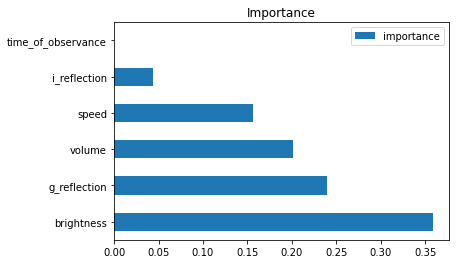

In [72]:
importance_df.plot(kind='barh', sort_columns=False, title='Importance')

In [78]:
importance_df.idxmax()

importance    brightness
dtype: object

In [79]:
space = pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')

In [92]:
y = space.dangerous

In [91]:
X = space.drop('dangerous', axis=1)

In [97]:
rscvTree = RandomizedSearchCV(RandomForestClassifier(),parameters, cv=3, n_jobs=-1)

In [98]:
rscvTree.fit(X,y)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': range(5, 16, 5),
                                        'n_estimators': range(15, 46, 5)})

In [99]:
best_tree_space = rscvTree.best_estimator_

In [102]:
importance_df_2 = pd.DataFrame(best_tree_space.feature_importances_, index=X.columns).rename(columns={0 : 'importance'})

In [103]:
importance_df_2

,importance
r,0.004008
phi,0.003809
peradventure_index,0.003400
dustiness,0.006019
black_hole_is_near,0.021646
buggers_were_noticed,0.508593
nearby_system_has_planemo,0.452526


In [105]:
space.corr()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
r,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
phi,0.001023,1.000000,0.001023,0.001921,0.002875,-0.004726,-0.000803,0.003035
peradventure_index,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
dustiness,-0.003336,0.001921,-0.003336,1.000000,-0.004691,-0.001290,0.003370,-0.000499
black_hole_is_near,0.002337,0.002875,0.002337,-0.004691,1.000000,-0.001874,0.002661,0.052968
buggers_were_noticed,0.001797,-0.004726,0.001797,-0.001290,-0.001874,1.000000,-0.003031,0.344469
nearby_system_has_planemo,0.000326,-0.000803,0.000326,0.003370,0.002661,-0.003031,1.000000,0.299508
dangerous,0.005788,0.003035,0.005788,-0.000499,0.052968,0.344469,0.299508,1.000000
